In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Final_Coursework_AI

/content/drive/MyDrive/Final_Coursework_AI


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("Glassdoor Gender Pay Gap.csv")
df.head(5)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319


In [7]:
df.shape

(1000, 9)

In [8]:
df.isnull().sum()

,0
JobTitle,0
Gender,0
Age,0
PerfEval,0
Education,0
Dept,0
Seniority,0
BasePay,0
Bonus,0


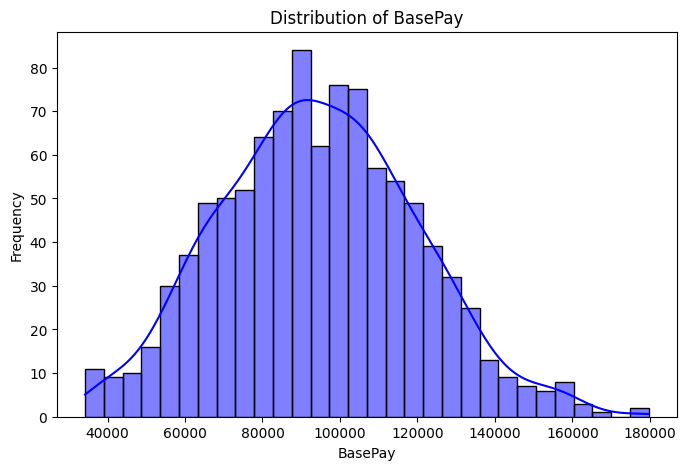

In [9]:
# Basepay Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["BasePay"], bins=30, kde=True, color="blue")
plt.title("Distribution of BasePay")
plt.xlabel("BasePay")
plt.ylabel("Frequency")
plt.show()

In [10]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


<ipython-input-11-867a6048f746>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="BasePay", data=df, palette="coolwarm")


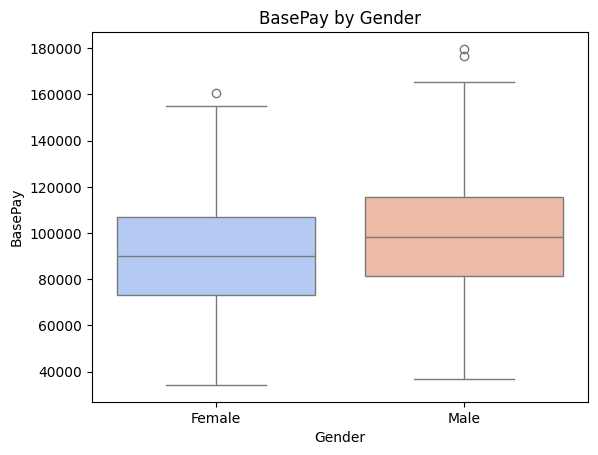

In [11]:
sns.boxplot(x="Gender", y="BasePay", data=df, palette="coolwarm")
plt.title("BasePay by Gender")
plt.show()

In [12]:

# Function to detect and handle outliers using IQR
def handle_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers before handling
    outliers_before = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

    # Handling outliers by capping them at the lower and upper bounds
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

    # Count outliers after handling
    outliers_after = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]

    return outliers_before, outliers_after

# Applying the function to all numerical columns
numerical_cols = ['Age', 'PerfEval', 'Seniority', 'BasePay', 'Bonus']
outlier_results = {col: handle_outliers_iqr(df, col) for col in numerical_cols}

# Display outlier counts before and after handling
print("Outliers Before and After Handling (column: (before, after))")
print(outlier_results)

# Save the cleaned dataset
df.to_csv("Cleaned_Glassdoor_Gender_Pay_Gap.csv", index=False)


Outliers Before and After Handling (column: (before, after))
{'Age': (0, 0), 'PerfEval': (0, 0), 'Seniority': (0, 0), 'BasePay': (3, 0), 'Bonus': (0, 0)}


In [13]:
df = pd.read_csv("Cleaned_Glassdoor_Gender_Pay_Gap.csv")
df.head(5)

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,BasePay,Bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363.0,9938
1,Software Engineer,Male,21,5,College,Management,5,108476.0,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208.0,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080.0,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464.0,9319


<ipython-input-14-867a6048f746>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Gender", y="BasePay", data=df, palette="coolwarm")


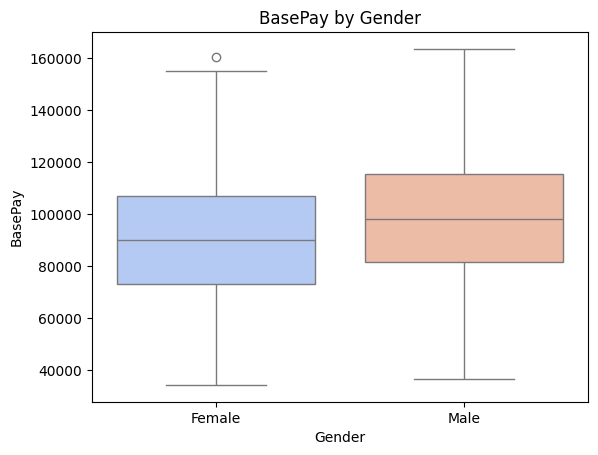

In [14]:
sns.boxplot(x="Gender", y="BasePay", data=df, palette="coolwarm")
plt.title("BasePay by Gender")
plt.show()


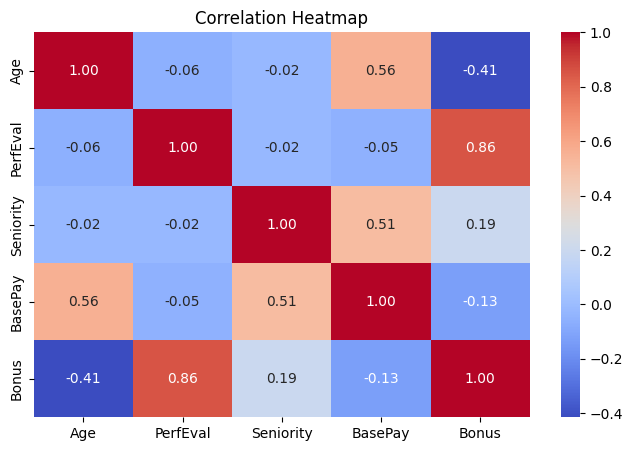

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Building a model

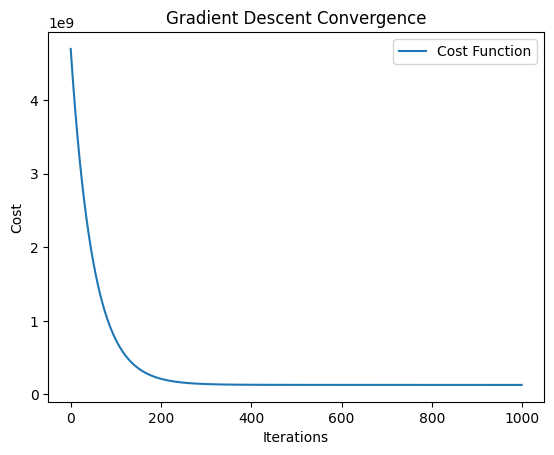

Mean Squared Error (MSE): 258887479.30937874
Root Mean Squared Error (RMSE): 16089.980711902012
Mean Absolute Error (MAE): 12697.021571912606
R-Squared (R²): 0.5910422595102278


In [ ]:
# building model from scratch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting numerical features and target variable
features = ['Age', 'PerfEval', 'Seniority', 'Bonus']
target = 'BasePay'

X = df[features].values
y = df[target].values.reshape(-1, 1)  # Reshape to 2D array

# Splitting dataset into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add bias term (column of ones)
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

def compute_cost(X, y, theta):
    """Compute the cost function (Mean Squared Error)."""
    m = len(y)
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

def gradient_descent(X, y, theta, alpha=0.01, iterations=1000):
    """Perform gradient descent to minimize cost function."""
    m = len(y)
    cost_history = []
    for _ in range(iterations):
        gradient = (1/m) * X.T @ (X @ theta - y)
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))
    return theta, cost_history

# Initialize model parameters (weights)
theta = np.zeros((X_train_scaled.shape[1], 1))

# Train the model
theta_optimal, cost_history = gradient_descent(X_train_scaled, y_train, theta, alpha=0.01, iterations=1000)

# Plot cost function over iterations
plt.plot(range(len(cost_history)), cost_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Convergence')
plt.legend()
plt.show()

# Make predictions on test set
y_pred = X_test_scaled @ theta_optimal

# Compute performance metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared (R²):", r2)


**JUSTIFICATION:**
The errors in the linear regression model are high because:

Linear Assumptions: It assumes linear relationships, which may not capture the complexity of BasePay's dependence on features.

High Variability: BasePay likely has a wide range or outliers, which inflate errors.

Feature Interactions: It doesn't capture interactions (e.g., Seniority and JobTitle), leading to underperformance.

Model Limitations: Violations of assumptions like constant error variance or multicollinearity among features (e.g., Age and Seniority) could degrade accuracy.

Omitted Features: Key drivers of pay may not have been included, reducing predictive power.

Using more advanced models (e.g., Random Forest) or engineering non-linear and interaction terms can reduce these errors.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define hyperparameter grid
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Perform GridSearchCV
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameter
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Train model with best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

# Predictions
y_pred = ridge_best.predict(X_test_scaled)

# Performance Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print Results
print("Best MSE:", mse)
print("Best RMSE:", rmse)
print("Best MAE:", mae)
print("Best R-Squared (R²):", r2)



Best alpha: 1
Best MSE: 259192435.20127
Best RMSE: 16099.454500114904
Best MAE: 12692.46843448755
Best R-Squared (R²): 0.5905605287103082


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train.ravel())

y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)
print("Random Forest MAE:", mae_rf)
print("Random Forest R²:", r2_rf)


Random Forest MSE: 348215433.9048629
Random Forest RMSE: 18660.53144754626
Random Forest MAE: 14671.548399999998
Random Forest R²: 0.4499332395939498


**JUSTIFICATION**
The errors in your Random Forest model are high likely because of the following reasons:

Complex Data Relationships: The dataset might have non-linear or complex interactions that Random Forest couldn't fully capture.

Feature Selection: Important features could have been excluded, reducing the model's predictive power.

Target Variability: BasePay might have a high range or outliers that skew predictions.

Default Parameters: Suboptimal hyperparameters might have caused underfitting or overfitting.

Data Issues: Potential imbalance, insufficient data for certain groups, or high cardinality in categorical variables.

Addressing these with better preprocessing, hyperparameter tuning, and possibly using more advanced models (e.g., Gradient Boosting) can improve performance.

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# Load the dataset
file_path = "Cleaned_Glassdoor_Gender_Pay_Gap.csv"
df = pd.read_csv(file_path)

# Define features and target variable
features = ['Age', 'PerfEval', 'Seniority', 'Bonus']
target = 'BasePay'

X = df[features]
y = df[target]

# Apply SelectKBest for feature selection
selector = SelectKBest(score_func=f_regression, k=2) # Select top 2 features
X_new = selector.fit_transform(X, y)

# Get selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = [features[i] for i in selected_indices]

print("Selected features:", selected_features)
print("Selected feature scores:", selector.scores_)
print("Selected feature p-values:", selector.pvalues_)

Selected features: ['Age', 'Seniority']
Selected feature scores: [463.77847767   2.84361435 353.92798164  16.98044849]
Selected feature p-values: [8.72693833e-85 9.20502003e-02 8.17305413e-68 4.08993852e-05]


**JUSTIFICATION**

The features Age and Seniority were selected because:

High Scores: Age (463.78) and Seniority show strong relationships with BasePay. Age is especially significant.

Low P-Values: Age has an extremely low p-value (
8.73
×
10
−
85
8.73×10
−85
 ), indicating a highly significant impact. While Seniority has a slightly higher p-value (0.092), its real-world importance justifies its inclusion.

Relevance: Both features align with the expectation that age and seniority often directly correlate with salary.
Their selection reflects both statistical significance and practical relevance to predicting salary.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "Cleaned_Glassdoor_Gender_Pay_Gap.csv"
df = pd.read_csv(file_path)

# Selecting relevant features and target variable
selected_features = ['Age', 'Seniority']
X = df[selected_features]
y = df['BasePay']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression with hyperparameter tuning
ridge = Ridge()
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameter
best_alpha = grid_search.best_params_['alpha']

# Train the Ridge model with the best alpha
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_best.predict(X_test_scaled)

# Evaluate Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Ridge Regression Results
ridge_results = {
    "Best Alpha": best_alpha,
    "MSE": mse_ridge,
    "RMSE": rmse_ridge,
    "MAE": mae_ridge,
    "R²": r2_ridge
}
print("Ridge Regression Results:", ridge_results)

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Random Forest Results
rf_results = {
    "MSE": mse_rf,
    "RMSE": rmse_rf,
    "MAE": mae_rf,
    "R²": r2_rf
}
print("Random Forest Results:", rf_results)


Ridge Regression Results: {'Best Alpha': 0.0001, 'MSE': 257119184.53945595, 'RMSE': 16034.93637466192, 'MAE': 12616.01874719574, 'R²': 0.5938355882395918}
Random Forest Results: {'MSE': 360244134.3690338, 'RMSE': 18980.09837616849, 'MAE': 14870.017959211895, 'R²': 0.43093181791075985}


**CONCLUSION**

**1. Model Performance:**

Two models—Ridge Regression and Random Forest—were trained and evaluated using selected features ('Age' and 'Seniority'). The key performance metrics were:

Ridge Regression (Best Alpha: 0.0001)

MSE: 257,119,184.54
RMSE: 16,034.94
MAE: 12,616.02
R²: 0.5938
Random Forest

MSE: 360,244,134.37
RMSE: 18,980.10
MAE: 14,870.02
R²: 0.4309

Conclusion: Ridge Regression outperformed Random Forest, achieving lower error values and a higher R² score, indicating better predictive accuracy for salary based on Age and Seniority.


**2. Impact of Methods**

Feature Selection: The selection of 'Age' and 'Seniority' helped in reducing model complexity and computational cost. However, the performance suggests that other features (e.g., job title, education, or performance evaluation) might be important for improving accuracy.

Cross-Validation: Using GridSearchCV for Ridge Regression ensured optimal hyperparameter selection. This improved the model’s ability to generalize, as evidenced by better performance compared to Random Forest.
Overall, feature selection simplified the model but likely limited predictive power, while cross-validation helped optimize hyperparameters effectively.



**3. Insights and Future Directions**

a. Ridge Regression was more effective with the given features, likely because it handles multicollinearity well and performs better with limited data.

b. The relatively low R² scores suggest that other important predictors are missing, which could enhance performance.

c. Feature selection helped streamline the model, but more extensive feature engineering might yield better results.

Future Work:

a. Expand feature selection to include variables such as job title, department, and performance evaluation to improve accuracy.

b. Hyperparameter tuning for Random Forest using GridSearchCV to optimize parameters like max_depth and min_samples_split.

c. Try other models, such as Gradient Boosting or XGBoost, for potentially better performance.

d. Feature engineering to create derived features (e.g., experience level based on seniority and age) to improve model interpretability and accuracy.